# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt = pd.read_excel('matches.xlsx')
dt.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Shape 

In [3]:
dt.shape

(636, 18)

In [4]:
# 636 rows and 18 columns

# Columns

In [5]:
dt.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#

# Basic Info

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

# Null values

In [7]:
dt.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

# Drop

Let's drop the umpire1, umpire2 and umpire3, id and date columns

In [8]:
dt.drop(['id','date','umpire1','umpire2','umpire3'], axis = 1, inplace = True)

In [9]:
dt.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


# Number of seasons

In [10]:
dt.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

# Number of matches in each season

In [11]:
no_of_matches = pd.DataFrame({'Year':dt.season.value_counts().index,'Matches' :dt.season.value_counts().values})
no_of_matches = no_of_matches.sort_values(by='Matches', ascending =False)
no_of_matches

,Year,Matches
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2017,59
7,2015,59
8,2008,58
9,2009,57


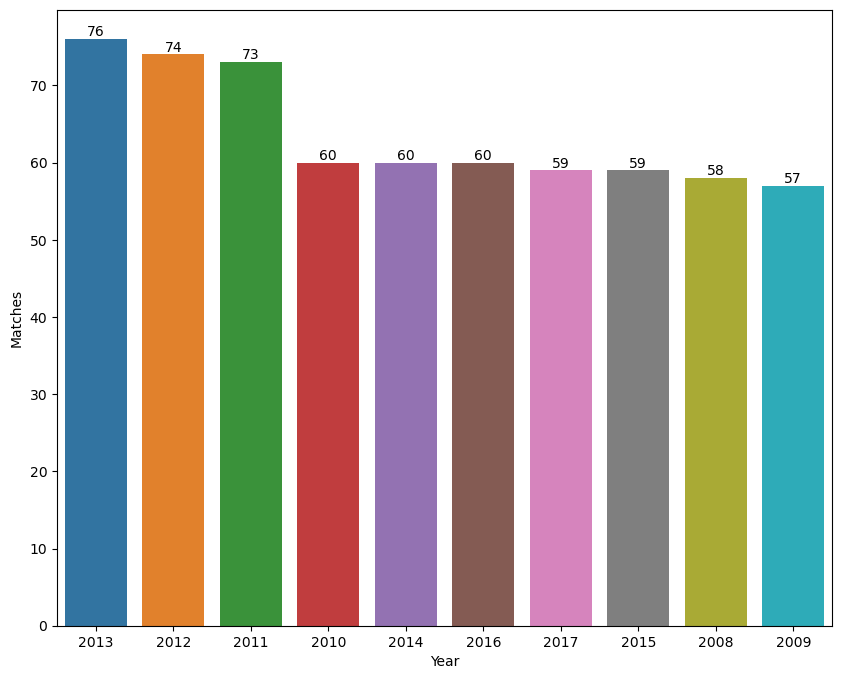

In [15]:
plt.figure(figsize = (10,8), dpi = 100)
ax=sns.barplot(x='Year', y='Matches', data = no_of_matches, order=no_of_matches['Year'])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

# Name of Cities where matches are played

In [29]:
dt.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

# The no. of matches played in a particular city

In [34]:
dt.city.value_counts()

city
Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: count, dtype: int64

# Cities where more than 40 matched played

In [37]:
city = dt.city.value_counts()
city # converted into a series

city
Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: count, dtype: int64

In [40]:
city[city>=40]

city
Mumbai        85
Bangalore     66
Kolkata       61
Delhi         60
Hyderabad     49
Chennai       48
Chandigarh    46
Name: count, dtype: int64

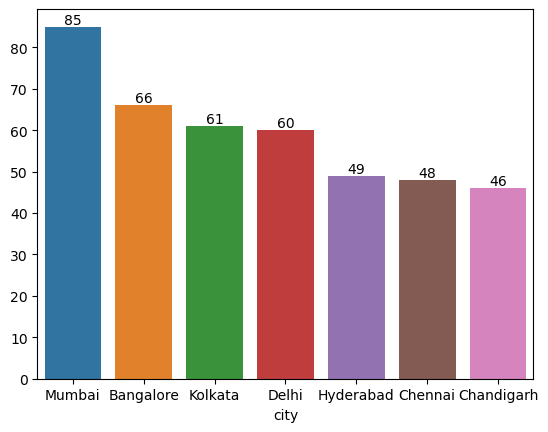

In [47]:
ax = sns.barplot(x=city[city>=40].index, y=city[city>40].values)
for i in ax.containers:
    ax.bar_label(i)

# The percentage of the most matches played in a city 

In [48]:
dt.city.value_counts()*100/len(dt)

city
Mumbai            13.364780
Bangalore         10.377358
Kolkata            9.591195
Delhi              9.433962
Hyderabad          7.704403
Chennai            7.547170
Chandigarh         7.232704
Jaipur             5.188679
Pune               5.031447
Durban             2.358491
Ahmedabad          1.886792
Centurion          1.886792
Visakhapatnam      1.729560
Rajkot             1.572327
Dharamsala         1.415094
Johannesburg       1.257862
Cape Town          1.100629
Abu Dhabi          1.100629
Ranchi             1.100629
Port Elizabeth     1.100629
Cuttack            1.100629
Raipur             0.943396
Sharjah            0.943396
Kochi              0.786164
Indore             0.786164
Kanpur             0.628931
Nagpur             0.471698
Kimberley          0.471698
East London        0.471698
Bloemfontein       0.314465
Name: count, dtype: float64

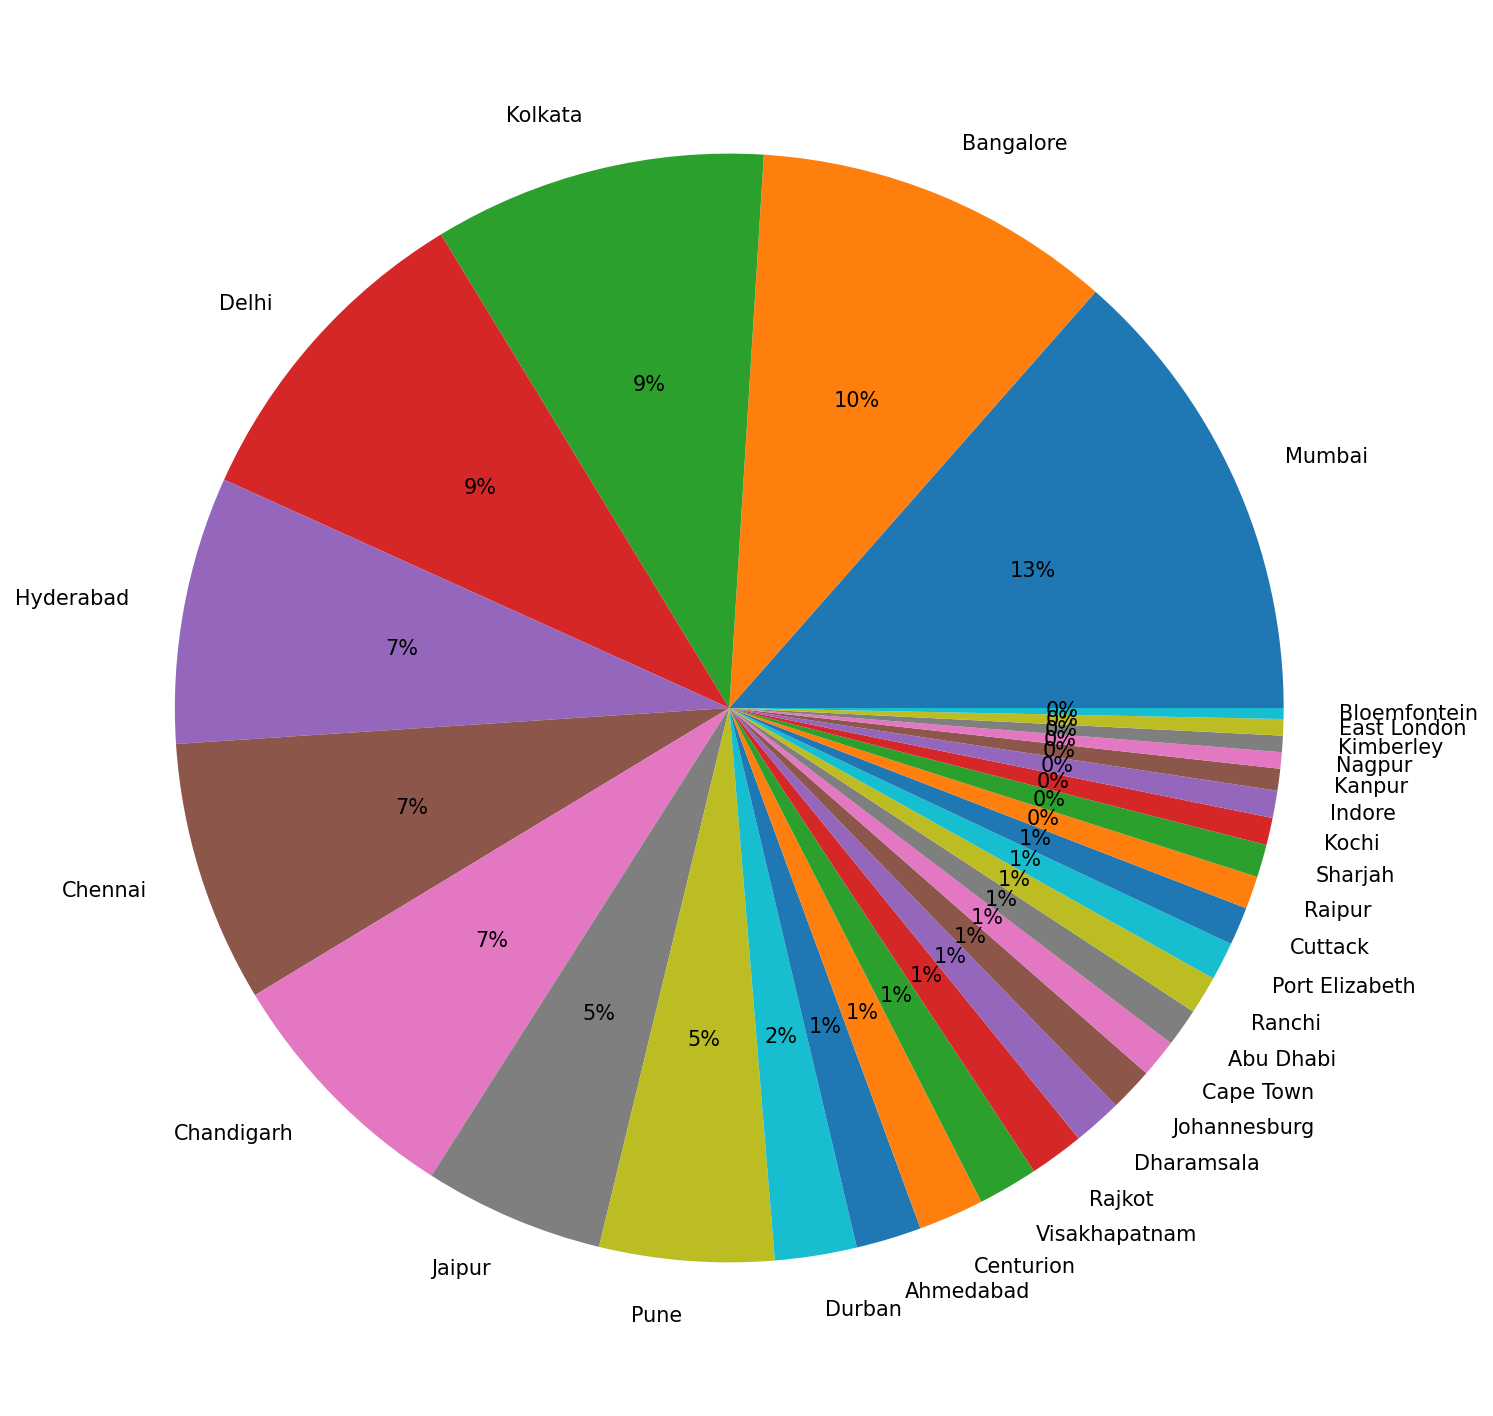

In [63]:
plt.figure(figsize = (15,12), dpi =150)
plt.pie(dt.city.value_counts(), labels =dt.city.value_counts().index, autopct = '%d%%')

plt.show()

# Total teams year wise

In [82]:
t1 = dt[dt.season == 2017]['team1'].unique()
t1

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab'],
      dtype=object)

In [74]:
t2 =dt[dt.season == 2017]['team2'].unique()
t2

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions'],
      dtype=object)

In [86]:
def year_wise(year):
    t1 = dt[dt.season==year]['team1'].unique()
    t2 = dt[dt.season==year]['team2'].unique()

    lst=[]
    
    for i in t1:
        lst.append(i)
    for i in t2:
        if i not in lst:
            lst.append(i)
    if lst == []:
        return 'Not found'
    else:
        return lst

In [88]:
year_wise(2008)

['Kolkata Knight Riders',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Deccan Chargers',
 'Kings XI Punjab',
 'Royal Challengers Bangalore',
 'Delhi Daredevils']

# Number of matches won by each team in 2017

In [89]:
dt[dt.season==2017]['winner'].value_counts()

winner
Mumbai Indians                 12
Rising Pune Supergiant         10
Kolkata Knight Riders           9
Sunrisers Hyderabad             8
Kings XI Punjab                 7
Delhi Daredevils                6
Gujarat Lions                   4
Royal Challengers Bangalore     3
Name: count, dtype: int64

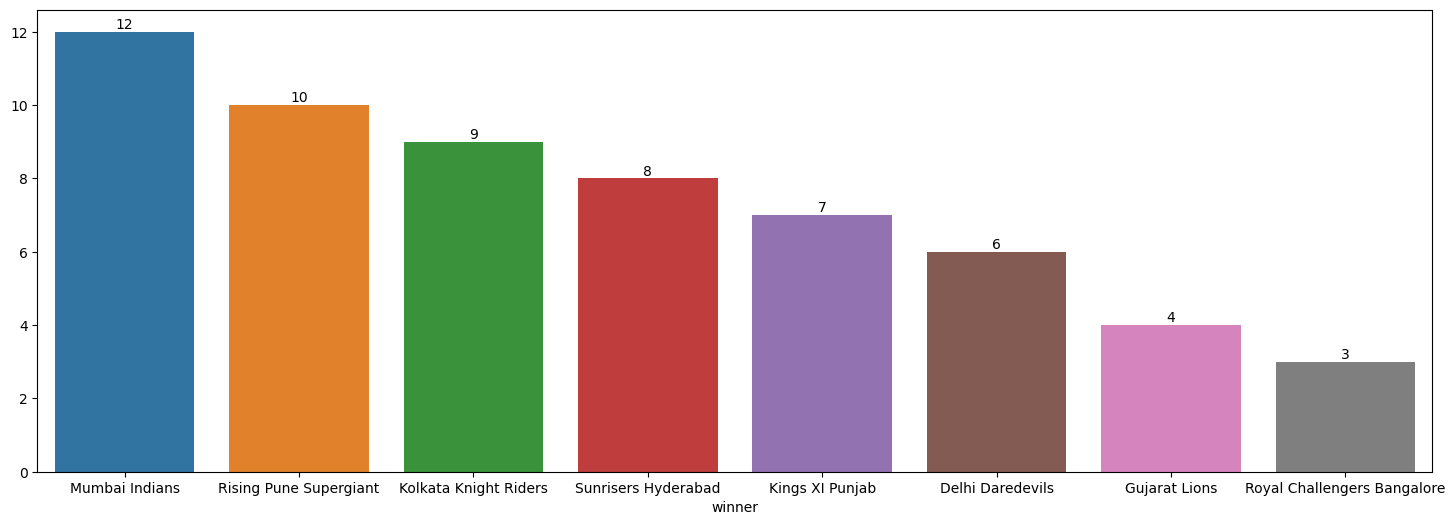

In [96]:
plt.figure(figsize = (18,6), dpi = 100)
ax = sns.barplot(x = dt[dt.season==2017]['winner'].value_counts().index, y = dt[dt.season==2017]['winner'].value_counts().values)
for i in ax.containers:
    ax.bar_label(i)

# Number of matches won by each team 

In [100]:
def matches_won(year):
    return dt[dt.season==year]['winner'].value_counts()

In [99]:
def bar_plot(year):
    plt.figure(figsize = (18,6), dpi=100)
    ax=sns.barplot(x=dt[dt.season==year]['winner'].value_counts().index, y=dt[dt.season==year]['winner'].value_counts().values)
    for i in ax.containers:
        ax.bar_label(i)

In [106]:
matches_won(2009)

winner
Delhi Daredevils               10
Royal Challengers Bangalore     9
Deccan Chargers                 9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: count, dtype: int64

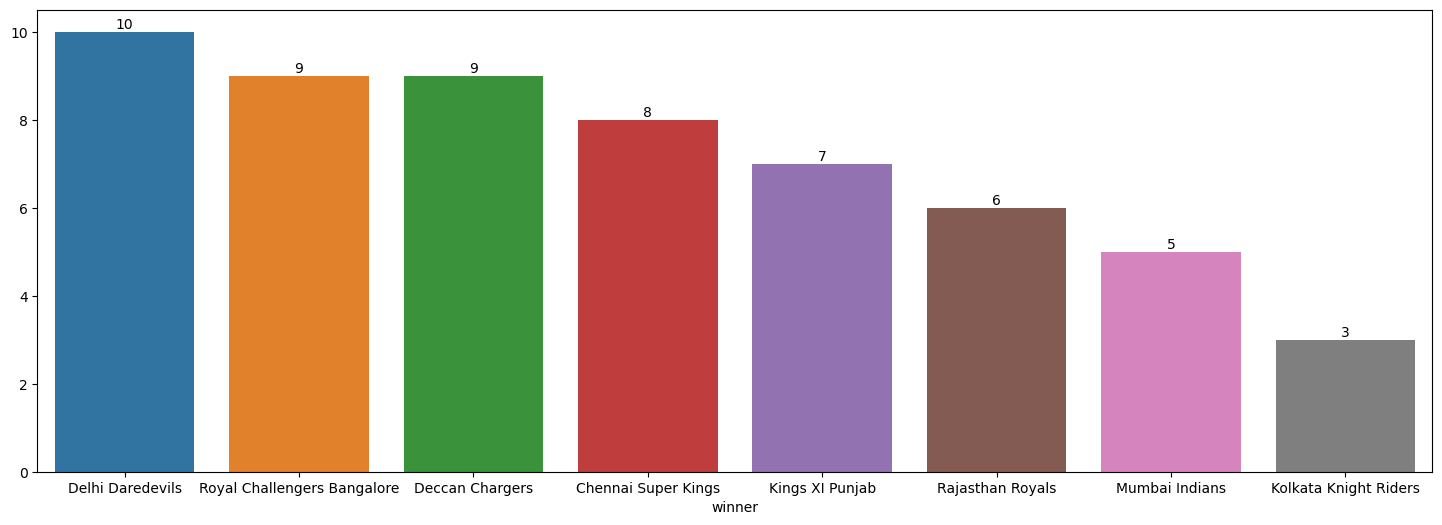

In [107]:
bar_plot(2009)

# Maximum toss winner in each year

In [109]:
dt.columns

Index(['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue'],
      dtype='object')

In [122]:
def toss_winner(year):
    return dt[dt.season == year]['toss_winner'].value_counts()

In [124]:
toss_winner(2012)

toss_winner
Mumbai Indians                 11
Delhi Daredevils               10
Rajasthan Royals               10
Deccan Chargers                 9
Kings XI Punjab                 8
Kolkata Knight Riders           7
Chennai Super Kings             7
Pune Warriors                   6
Royal Challengers Bangalore     6
Name: count, dtype: int64

## Conclusions

From the Exploratory Data Analysis of the IPL data, following conclusions can be made:

1. Maximum matches has been played in Maharashtra
2. Maximum matches won by Mumbai Indians in 2017
3. In 2009 Delhi Daredevils won 10 matches
4. In 2012 maximum tosses were won by Mumbai Indians followed by Delhi Daredevils and Rajasthan Royals